Question 1: Use yfinance to Extract Stock Data

In [3]:
import yfinance as yf

# Extract Tesla stock data
tesla_data = yf.download("TSLA")

# Reset index, save, and display the first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\base.py:304: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\base.py:304: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

[*********************100%***********************]  1 of 1 completed


c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:267: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's revenue data (replace with actual URL)
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Attempt to find the table by class (change the class or use another method if needed)
table = soup.find('table', {'class': 'revenue-data'})

# Check if the table is found
if table:
    rows = table.find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)
    
    # Convert to DataFrame
    df = pd.DataFrame(data[1:], columns=data[0])  # Skip header row
    print(df.tail())  # Display last 5 rows
else:
    print("Table not found.")

Table not found.


Question 3: Use yfinance to Extract Stock Data (GameStop

In [18]:
# Extract GameStop stock data
gme_data = yf.download("GME")

# Reset index, save, and display the first five rows
gme_data.reset_index(inplace=True)
gme_data.head()

[*********************100%***********************]  1 of 1 completed


c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\base.py:304: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\base.py:305: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674835,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


Question 4: Use Webscraping to Extract GME Revenue Data

In [33]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd

# Initialize driver variable outside the try block
driver = None

try:
    # Set up the webdriver
    options = webdriver.ChromeOptions()
    # Comment out the line for headless mode to see the browser window
    # options.headless = True  # Run in headless mode (without opening browser)

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    # Navigate to the GME revenue page
    url_gme = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
    driver.get(url_gme)

    # Wait for the page to load fully (adjusting wait time)
    time.sleep(10)  # Increased wait time to 10 seconds

    # Extract the table (adjust the XPATH based on the structure)
    table = driver.find_element(By.XPATH, '//table')  # You may need to adjust this XPath based on the actual page

    # Use Pandas to read the HTML table
    df_gme = pd.read_html(table.get_attribute('outerHTML'))[0]

    # Display the last five rows of the dataframe
    print(df_gme.tail())

except ConnectionError as e:
    print(f"Connection error occurred: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if driver:
        driver.quit()  # Ensure the browser is closed if driver was initialized

An error occurred: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 131.0.6778.140 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00C3A813+48355]
	(No symbol) [0x00BCC4B1]
	(No symbol) [0x00AD5358]
	(No symbol) [0x00AF61AC]
	(No symbol) [0x00AF1EF3]
	(No symbol) [0x00AF0579]
	(No symbol) [0x00B20C55]
	(No symbol) [0x00B2093C]
	(No symbol) [0x00B1A536]
	(No symbol) [0x00AF82DC]
	(No symbol) [0x00AF93DD]
	GetHandleVerifier [0x00E9AABD+2539405]
	GetHandleVerifier [0x00EDA78F+2800735]
	GetHandleVerifier [0x00ED456C+2775612]
	GetHandleVerifier [0x00CC51E0+616112]
	(No symbol) [0x00BD5F8C]
	(No symbol) [0x00BD2328]
	(No symbol) [0x00BD240B]
	(No symbol) [0x00BC4FF7]
	BaseThreadInitThunk [0x7682FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77DA809E+286]
	RtlGetAppContainerNamedObjectPath [0x77DA806E+238]



Question 5: Plot Tesla Stock Graph

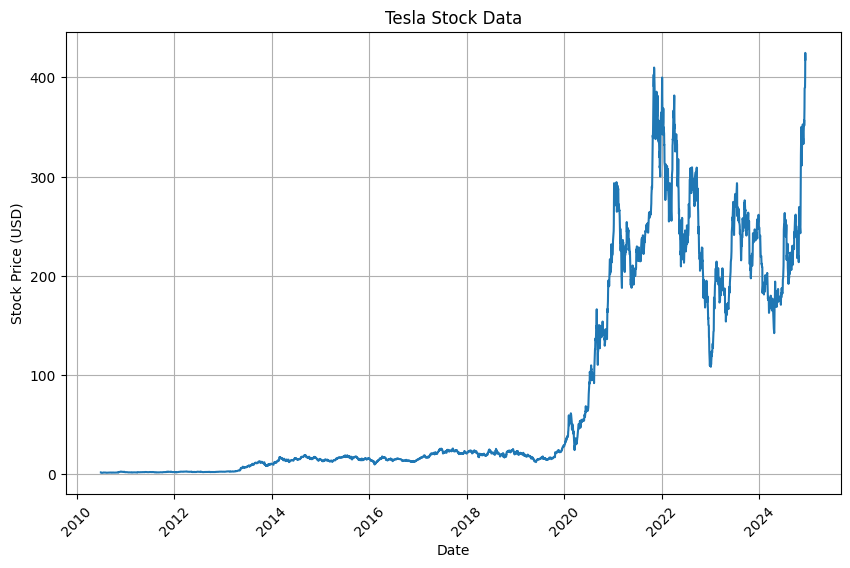

In [26]:
import matplotlib.pyplot as plt

# Function to plot Tesla stock graph
def make_graph(data, title="Tesla Stock Data"):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Tesla Stock Data")

Question 6: Plot GameStop Stock Graph

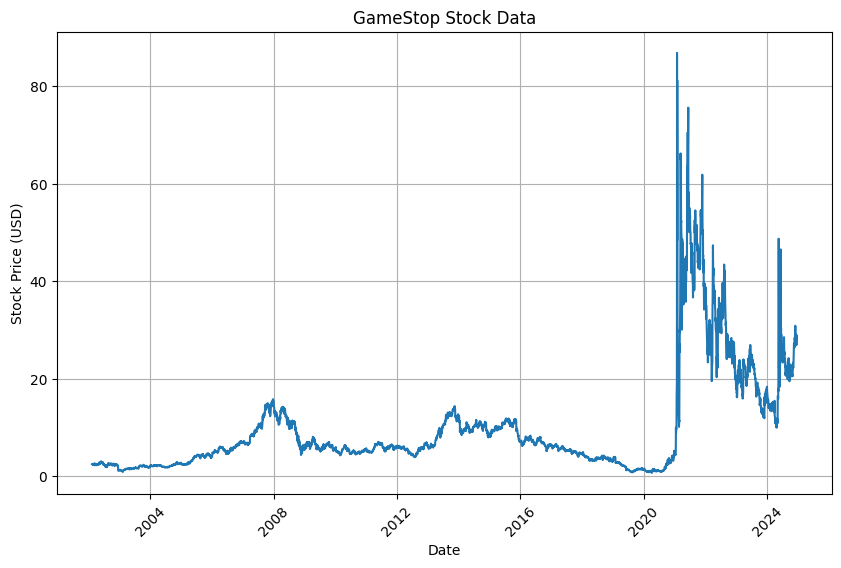

In [27]:
# Function to plot GameStop stock graph
def make_graph_gme(data, title="GameStop Stock Data"):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

make_graph_gme(gme_data, "GameStop Stock Data")